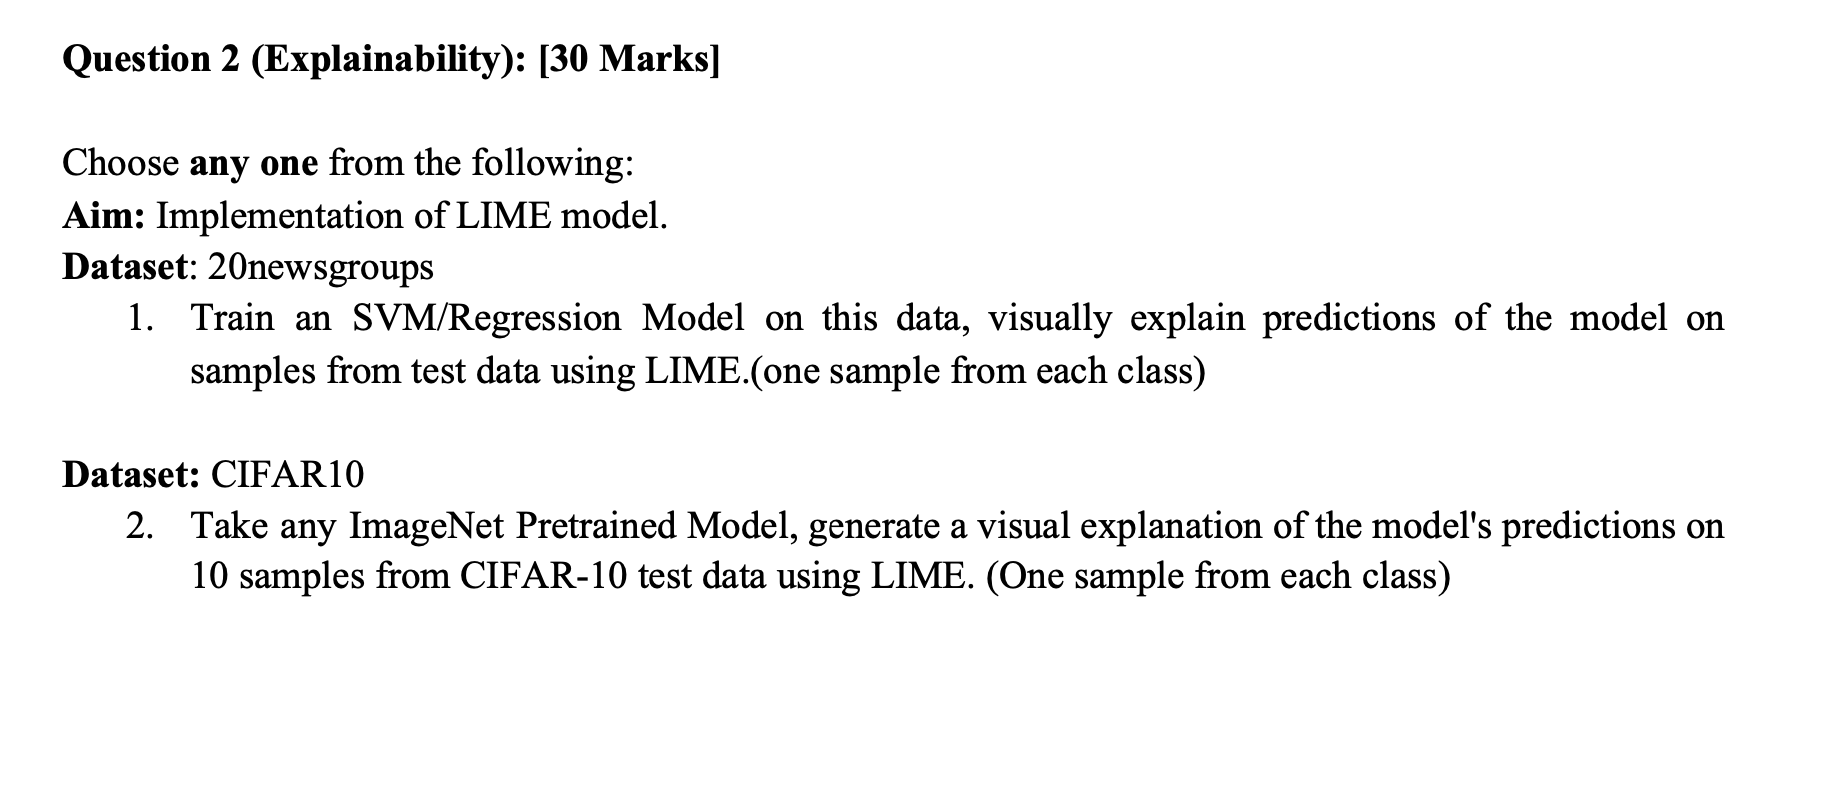

# Load Cifar 10 and then Pretrained Model

In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [2]:

filtered_images=[]
(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()
print('Images Shape: {}'.format(train_images.shape))
print('Labels Shape: {}'.format(train_labels.shape))
for i in range(0,10):
  idx = (train_labels == i).reshape(train_images.shape[0])
  # print('Index Shape: {}'.format(idx.shape))
  filtered_images.append(train_images[idx])
print('Filtered Images Shape: {}'.format(np.array(filtered_images).shape))

# Train Images
Xtrain_airplane = np.array(filtered_images[0])
Xtrain_automobile = np.array(filtered_images[1])
Xtrain_bird = np.array(filtered_images[2])
Xtrain_cat = np.array(filtered_images[3])
Xtrain_deer = np.array(filtered_images[4])
Xtrain_dog = np.array(filtered_images[5])
Xtrain_frog = np.array(filtered_images[6])
Xtrain_horse = np.array(filtered_images[7])
Xtrain_ship = np.array(filtered_images[8])
Xtrain_truck = np.array(filtered_images[9])

170500096/170498071 [==============================] - 2s 0us/step
Images Shape: (50000, 32, 32, 3)
Labels Shape: (50000, 1)
Filtered Images Shape: (10, 5000, 32, 32, 3)


In [3]:
filtered_labels = []
for i in range(0,10):
  idx = (train_labels == i).reshape(train_labels.shape[0])
  filtered_labels.append(train_labels[idx])
print('Filtered labels Shape: {}'.format(np.array(filtered_labels).shape))
# Train Labels
Ytrain_airplane = filtered_labels[0]
Ytrain_automobile = filtered_labels[1] 
Ytrain_bird = filtered_labels[2]
Ytrain_cat = filtered_labels[3]
Ytrain_deer = filtered_labels[4]
Ytrain_dog = filtered_labels[5]
Ytrain_frog = filtered_labels[6] 
Ytrain_horse = filtered_labels[7]
Ytrain_ship = filtered_labels[8]
Ytrain_truck = filtered_labels[9]

Filtered labels Shape: (10, 5000, 1)


In [4]:
filtered_images_test = []
for i in range(0,10):
  idx = (test_labels == i).reshape(test_images.shape[0])
  # print('Index Shape: {}'.format(idx.shape))
  filtered_images_test.append(test_images[idx])
print('Filtered Images Shape: {}'.format(np.array(filtered_images_test).shape))
# Test Images
Xtest_airplane = np.array(filtered_images_test[0])
Xtest_automobile = np.array(filtered_images_test[1])
Xtest_bird = np.array(filtered_images_test[2])
Xtest_cat = np.array(filtered_images_test[3])
Xtest_deer = np.array(filtered_images_test[4])
Xtest_dog = np.array(filtered_images_test[5])
Xtest_frog = np.array(filtered_images_test[6])
Xtest_horse = np.array(filtered_images_test[7])
Xtest_ship = np.array(filtered_images_test[8])
Xtest_truck = np.array(filtered_images_test[9])

filtered_labels_test = []
for i in range(0,10):
  idx = (test_labels == i).reshape(test_labels.shape[0])
  filtered_labels_test.append(test_labels[idx])
print('Filtered labels Shape: {}'.format(np.array(filtered_labels_test).shape))

# Test Labels
Ytest_airplane = filtered_labels_test[0]
Ytest_automobile = filtered_labels_test[1]
Ytest_bird = filtered_labels_test[2]
Ytest_cat = filtered_labels_test[3]
Ytest_deer = filtered_labels_test[4]
Ytest_dog = filtered_labels_test[5]
Ytest_frog = filtered_labels_test[6]
Ytest_horse = filtered_labels_test[7]
Ytest_ship = filtered_labels_test[8]
Ytest_truck = filtered_labels_test[9]

Filtered Images Shape: (10, 1000, 32, 32, 3)
Filtered labels Shape: (10, 1000, 1)


In [5]:
X_train = np.concatenate((Xtrain_airplane,
                          Xtrain_automobile,
                          Xtrain_bird,
                          Xtrain_cat,
                          Xtrain_deer,
                          Xtrain_dog,
                          Xtrain_frog,
                          Xtrain_horse,
                          Xtrain_ship,
                          Xtrain_truck))

Y_train = np.concatenate((Ytrain_airplane,
                          Ytrain_automobile,
                          Ytrain_bird,
                          Ytrain_cat,
                          Ytrain_deer,
                          Ytrain_dog,
                          Ytrain_frog,
                          Ytrain_horse,
                          Ytrain_ship,
                          Ytrain_truck))

X_test = np.concatenate((Xtest_airplane,
                          Xtest_automobile,
                          Xtest_bird,
                          Xtest_cat,
                          Xtest_deer,
                          Xtest_dog,
                          Xtest_frog,
                          Xtest_horse,
                          Xtest_ship,
                          Xtest_truck))

Y_test = np.concatenate((Ytest_airplane,
                          Ytest_automobile,
                          Ytest_bird,
                          Ytest_cat,
                          Ytest_deer,
                          Ytest_dog,
                          Ytest_frog,
                          Ytest_horse,
                          Ytest_ship,
                          Ytest_truck))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
classes = ["airplane",#0
           "automobile",#1
           "bird",#2
           "cat",#3
           "deer",#4
           "dog",#5
           "frog",#6
           "horse",#7
           "ship",#8
           "truck"#9
           ]

The image in training set is desiplayed as:
The label associated with this image is in training set:
0
airplane


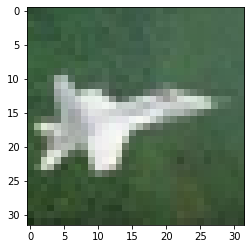

In [7]:

def show_label_and_image(X,Y,index):
  print("The image in training set is desiplayed as:")
  plt.imshow(np.array(X[index]))
  print("The label associated with this image is in training set:")
  print(Y[index][0])
  print(classes[Y[index][0]])
show_label_and_image(X_train, Y_train, 4)

# Load Pretrained model

In [8]:
resnet50 = tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

102973440/102967424 [==============================] - 0s 0us/step


In [9]:
# examples:
airplane =                        Xtest_airplane[np.random.randint(1000)]
automobile =                     Xtest_automobile[np.random.randint(1000)]
bird =                           Xtest_bird[np.random.randint(1000)]
cat =                           Xtest_cat[np.random.randint(1000)]
deer =                           Xtest_deer[np.random.randint(1000)]
dog =                           Xtest_dog[np.random.randint(1000)]
frog =                           Xtest_frog[np.random.randint(1000)]
horse =                           Xtest_horse[np.random.randint(1000)]
ship =                           Xtest_ship[np.random.randint(1000)]
truck =                           Xtest_truck[np.random.randint(1000)]

# LIME (Local Interpretable Model agnostic Explanations)


In [10]:
# ref : https://youtu.be/vz_fkVkoGFM
# ref : https://nbviewer.jupyter.org/urls/arteagac.github.io/blog/lime.ipynb
# ref : https://github.com/marcotcr/lime/tree/master/doc/notebooks
# ref : https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20images.ipynb


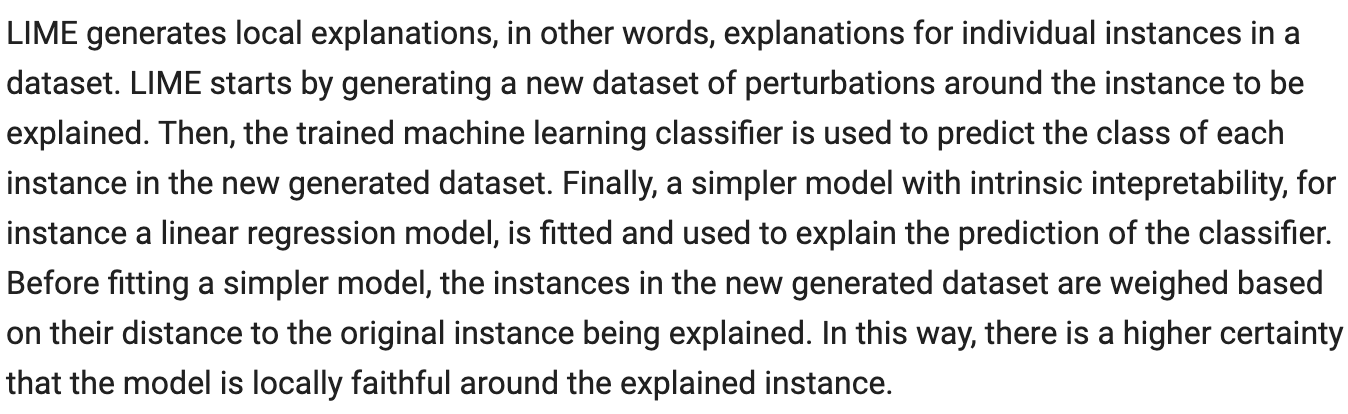

# FOR AIRPLANE

(224, 224, 3)
40960/35363 [==================================] - 0s 0us/step
('n02690373', 'airliner', 0.750129)
('n03706229', 'magnetic_compass', 0.042152025)
('n03658185', 'letter_opener', 0.040669985)
('n04008634', 'projectile', 0.03277063)
('n04266014', 'space_shuttle', 0.01734258)


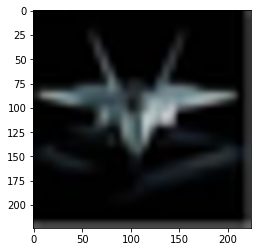

In [11]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy as np
from PIL import Image
# Lets first resize, 32 X 32 X 3 to 224 X 224 X 3 for resnet or vice versa
arr = airplane
img = Image.fromarray(arr)
img = img.resize((224, 224))
array_airplane = np.array(img)
print(array_airplane.shape)
# for airplane
plt.imshow(array_airplane)
preds = resnet50.predict(array_airplane.reshape((1,224,224,3)))
for x in decode_predictions(preds)[0]:
    print(x)


In [12]:
!pip install lime

     |████████████████████████████████| 276kB 15.8MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=5e9c6e6659c6bc7e4adb8479a49e8d945b652afb74b49e2f7a56827ae25a5919
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [13]:
# REF: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(array_airplane, resnet50.predict, top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


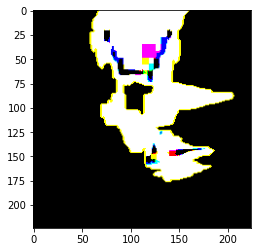

In [14]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))


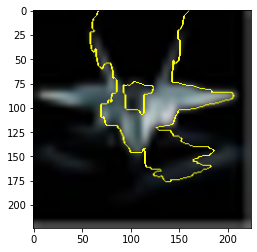

In [15]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

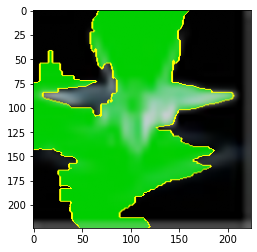

In [16]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

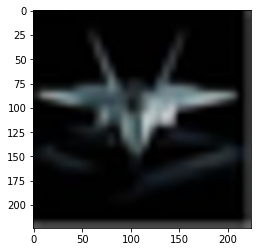

In [17]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp, mask))

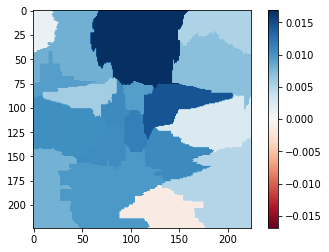

In [18]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# FOR AUTOMOBILE

(224, 224, 3)
('n04127249', 'safety_pin', 0.22775148)
('n04153751', 'screw', 0.17388493)
('n03840681', 'ocarina', 0.11934535)
('n04579432', 'whistle', 0.08764689)
('n03804744', 'nail', 0.067204475)


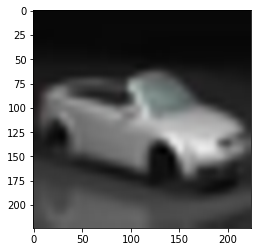

In [19]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy as np
from PIL import Image
# Lets first resize, 32 X 32 X 3 to 224 X 224 X 3 for resnet or vice versa
arr = automobile
img = Image.fromarray(arr)
img = img.resize((224, 224))
array_automobile = np.array(img)
print(array_automobile.shape)
# for automobile
plt.imshow(array_automobile)
preds = resnet50.predict(array_automobile.reshape((1,224,224,3)))
for x in decode_predictions(preds)[0]:
    print(x)


In [20]:
!pip install lime

In [21]:
# REF: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(array_automobile, resnet50.predict, top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


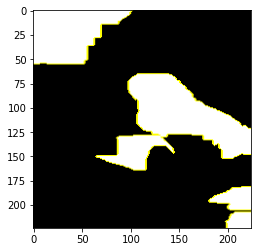

In [22]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))


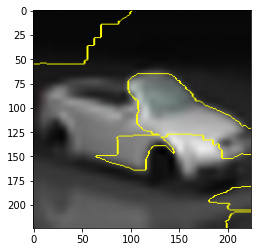

In [23]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

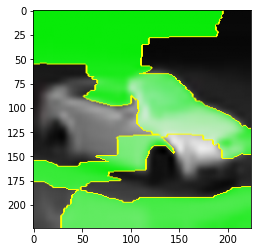

In [24]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

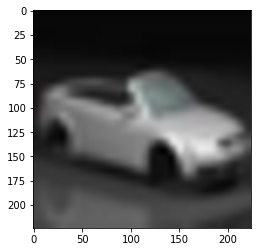

In [25]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp, mask))

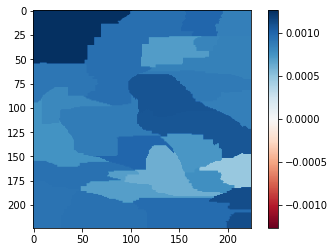

In [26]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# FOR BIRD

(224, 224, 3)
('n02423022', 'gazelle', 0.7805682)
('n02326432', 'hare', 0.06135845)
('n02422106', 'hartebeest', 0.034834128)
('n02437312', 'Arabian_camel', 0.029828925)
('n02006656', 'spoonbill', 0.023900127)


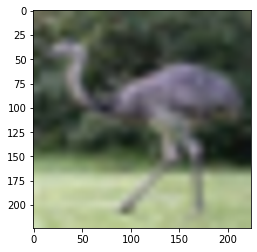

In [27]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy as np
from PIL import Image
# Lets first resize, 32 X 32 X 3 to 224 X 224 X 3 for resnet or vice versa
arr = bird
img = Image.fromarray(arr)
img = img.resize((224, 224))
array_bird = np.array(img)
print(array_bird.shape)
# for bird
plt.imshow(array_bird)
preds = resnet50.predict(array_bird.reshape((1,224,224,3)))
for x in decode_predictions(preds)[0]:
    print(x)


In [28]:
!pip install lime

In [29]:
# REF: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(array_bird, resnet50.predict, top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


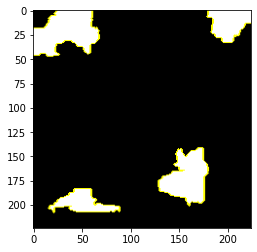

In [30]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))


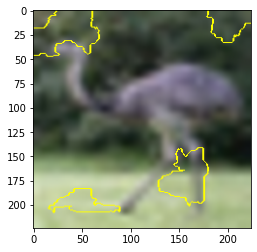

In [31]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

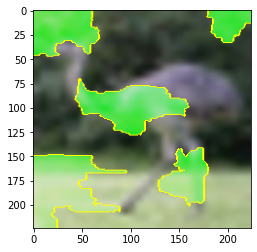

In [32]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

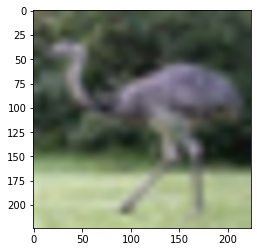

In [33]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp, mask))

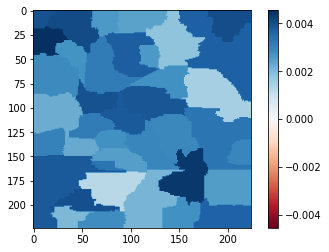

In [34]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# FOR CAT

(224, 224, 3)
('n03720891', 'maraca', 0.14015383)
('n03838899', 'oboe', 0.08392137)
('n03929855', 'pickelhaube', 0.08309369)
('n03017168', 'chime', 0.073104806)
('n04286575', 'spotlight', 0.068617016)


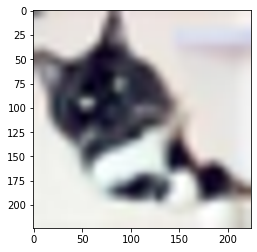

In [35]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy as np
from PIL import Image
# Lets first resize, 32 X 32 X 3 to 224 X 224 X 3 for resnet or vice versa
arr = cat
img = Image.fromarray(arr)
img = img.resize((224, 224))
array_cat = np.array(img)
print(array_cat.shape)
# for cat
plt.imshow(array_cat)
preds = resnet50.predict(array_cat.reshape((1,224,224,3)))
for x in decode_predictions(preds)[0]:
    print(x)


In [36]:
!pip install lime

In [37]:
# REF: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(array_cat, resnet50.predict, top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


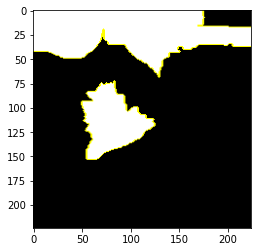

In [38]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))


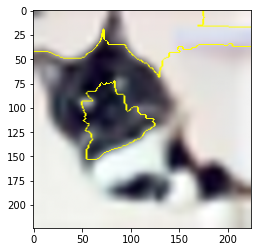

In [39]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

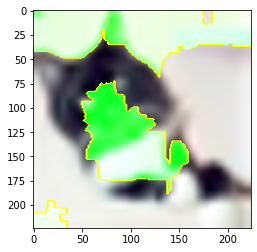

In [40]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

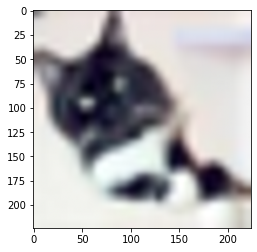

In [41]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp, mask))

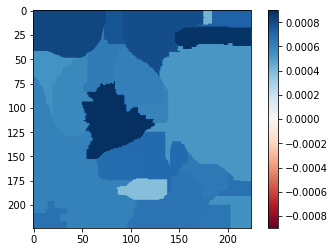

In [42]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# FOR deer

(224, 224, 3)
('n04380533', 'table_lamp', 0.42434388)
('n03637318', 'lampshade', 0.16963987)
('n03544143', 'hourglass', 0.108071916)
('n04286575', 'spotlight', 0.052803192)
('n03445777', 'golf_ball', 0.026853792)


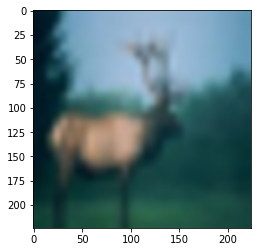

In [43]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy as np
from PIL import Image
# Lets first resize, 32 X 32 X 3 to 224 X 224 X 3 for resnet or vice versa
arr = deer
img = Image.fromarray(arr)
img = img.resize((224, 224))
array_deer = np.array(img)
print(array_deer.shape)
# for deer
plt.imshow(array_deer)
preds = resnet50.predict(array_deer.reshape((1,224,224,3)))
for x in decode_predictions(preds)[0]:
    print(x)


In [44]:
!pip install lime

In [45]:
# REF: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(array_deer, resnet50.predict, top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


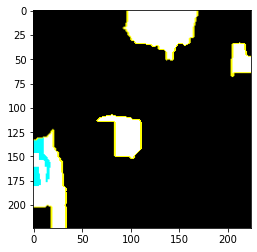

In [46]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))


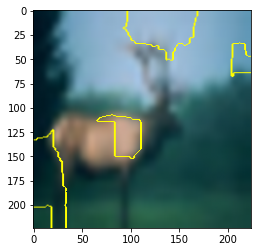

In [47]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

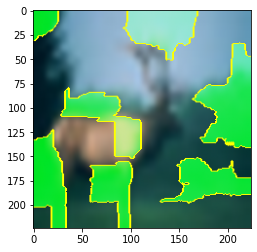

In [48]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

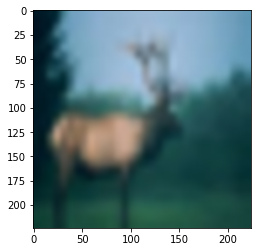

In [49]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp, mask))

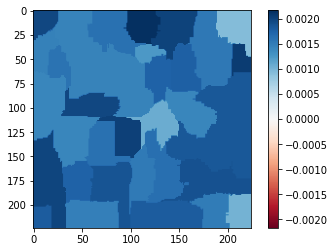

In [50]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# FOR DOG

(224, 224, 3)
('n02093647', 'Bedlington_terrier', 0.36283636)
('n02110806', 'basenji', 0.073156856)
('n02100236', 'German_short-haired_pointer', 0.06064714)
('n02087046', 'toy_terrier', 0.059847422)
('n02091244', 'Ibizan_hound', 0.04943172)


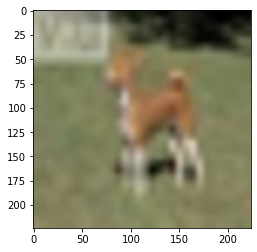

In [51]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy as np
from PIL import Image
# Lets first resize, 32 X 32 X 3 to 224 X 224 X 3 for resnet or vice versa
arr = dog
img = Image.fromarray(arr)
img = img.resize((224, 224))
array_dog = np.array(img)
print(array_dog.shape)
# for dog
plt.imshow(array_dog)
preds = resnet50.predict(array_dog.reshape((1,224,224,3)))
for x in decode_predictions(preds)[0]:
    print(x)


In [52]:
!pip install lime

In [53]:
# REF: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(array_dog, resnet50.predict, top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


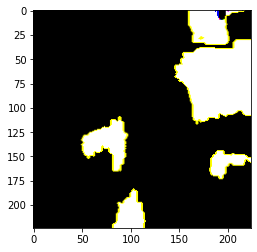

In [54]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))


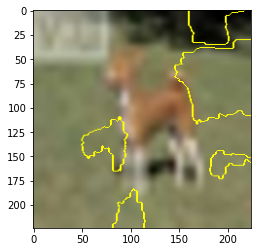

In [55]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

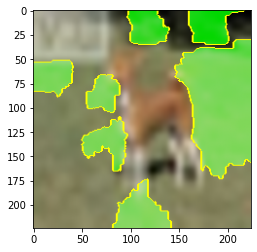

In [56]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

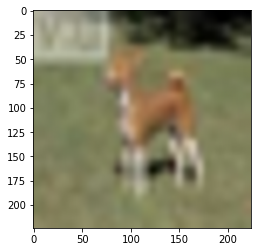

In [57]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp, mask))

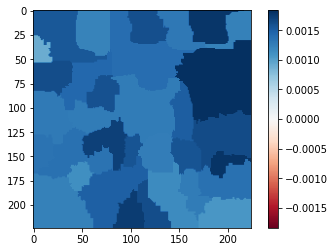

In [58]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# FOR FROG

(224, 224, 3)
('n01930112', 'nematode', 0.36716795)
('n04286575', 'spotlight', 0.20037551)
('n01990800', 'isopod', 0.1312926)
('n01776313', 'tick', 0.040999174)
('n02865351', 'bolo_tie', 0.029531723)


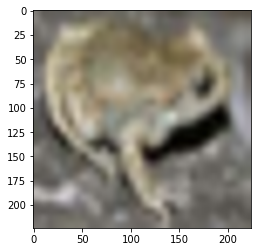

In [59]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy as np
from PIL import Image
# Lets first resize, 32 X 32 X 3 to 224 X 224 X 3 for resnet or vice versa
arr = frog
img = Image.fromarray(arr)
img = img.resize((224, 224))
array_frog = np.array(img)
print(array_frog.shape)
# for frog
plt.imshow(array_frog)
preds = resnet50.predict(array_frog.reshape((1,224,224,3)))
for x in decode_predictions(preds)[0]:
    print(x)


In [60]:
!pip install lime

In [61]:
# REF: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(array_frog, resnet50.predict, top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


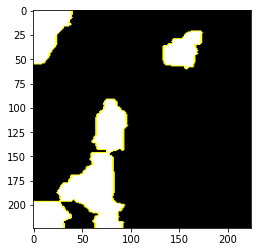

In [62]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))


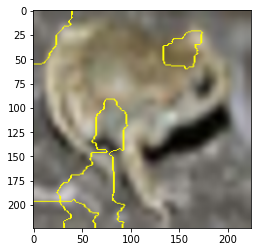

In [63]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

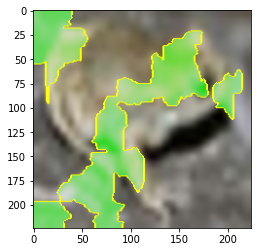

In [64]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

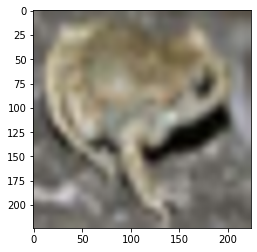

In [65]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp, mask))

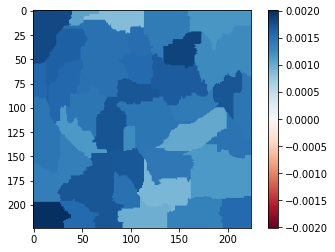

In [66]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# FOR HORSE

(224, 224, 3)
('n03804744', 'nail', 0.20845732)
('n04127249', 'safety_pin', 0.13645266)
('n03498962', 'hatchet', 0.058394317)
('n03532672', 'hook', 0.04425407)
('n04355933', 'sunglass', 0.022259263)


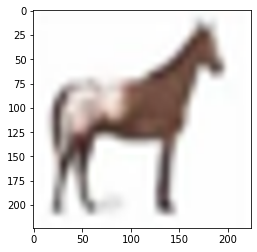

In [67]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy as np
from PIL import Image
# Lets first resize, 32 X 32 X 3 to 224 X 224 X 3 for resnet or vice versa
arr = horse
img = Image.fromarray(arr)
img = img.resize((224, 224))
array_horse = np.array(img)
print(array_horse.shape)
# for horse
plt.imshow(array_horse)
preds = resnet50.predict(array_horse.reshape((1,224,224,3)))
for x in decode_predictions(preds)[0]:
    print(x)


In [68]:
!pip install lime

In [69]:
# REF: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(array_horse, resnet50.predict, top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


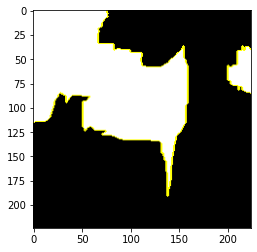

In [70]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))


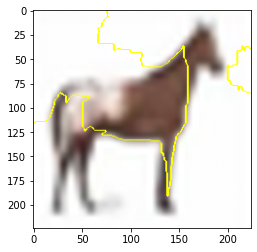

In [71]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

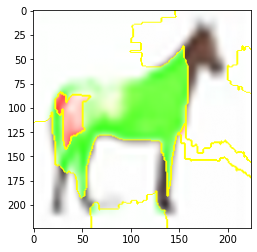

In [72]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

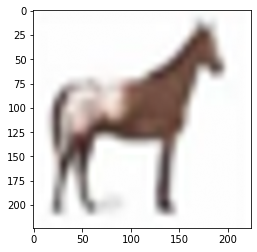

In [73]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp, mask))

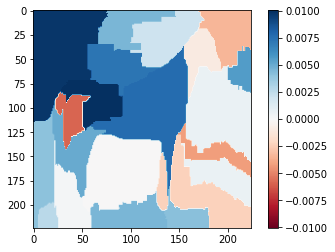

In [74]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# FOR SHIP

(224, 224, 3)
('n03544143', 'hourglass', 0.1971248)
('n04111531', 'rotisserie', 0.1422272)
('n04357314', 'sunscreen', 0.083955914)
('n03062245', 'cocktail_shaker', 0.08059975)
('n04127249', 'safety_pin', 0.042410206)


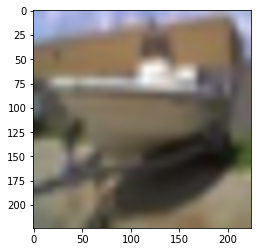

In [75]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy as np
from PIL import Image
# Lets first resize, 32 X 32 X 3 to 224 X 224 X 3 for resnet or vice versa
arr = ship
img = Image.fromarray(arr)
img = img.resize((224, 224))
array_ship = np.array(img)
print(array_ship.shape)
# for ship
plt.imshow(array_ship)
preds = resnet50.predict(array_ship.reshape((1,224,224,3)))
for x in decode_predictions(preds)[0]:
    print(x)


In [76]:
!pip install lime

In [77]:
# REF: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(array_ship, resnet50.predict, top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


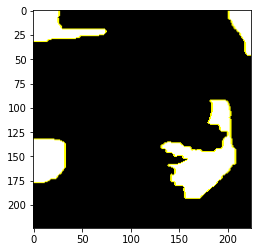

In [78]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))


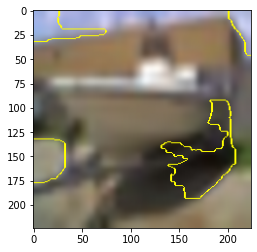

In [79]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

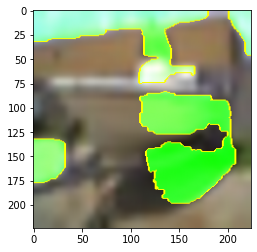

In [80]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

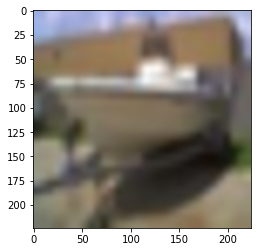

In [81]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp, mask))

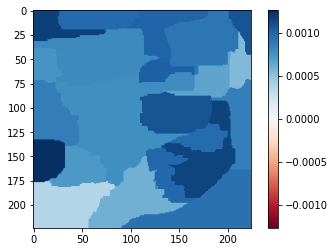

In [82]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# FOR TRUCK

(224, 224, 3)
('n04357314', 'sunscreen', 0.09799741)
('n04127249', 'safety_pin', 0.07424616)
('n04243546', 'slot', 0.07279747)
('n03476991', 'hair_spray', 0.06999105)
('n03075370', 'combination_lock', 0.06572189)


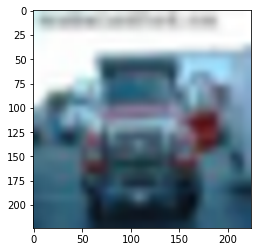

In [83]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy as np
from PIL import Image
# Lets first resize, 32 X 32 X 3 to 224 X 224 X 3 for resnet or vice versa
arr = truck
img = Image.fromarray(arr)
img = img.resize((224, 224))
array_truck = np.array(img)
print(array_truck.shape)
# for truck
plt.imshow(array_truck)
preds = resnet50.predict(array_truck.reshape((1,224,224,3)))
for x in decode_predictions(preds)[0]:
    print(x)


In [84]:
!pip install lime

In [85]:
# REF: https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(array_truck, resnet50.predict, top_labels=5, hide_color=0, num_samples=1000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


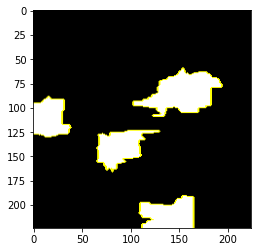

In [86]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))


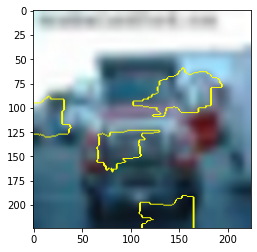

In [87]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

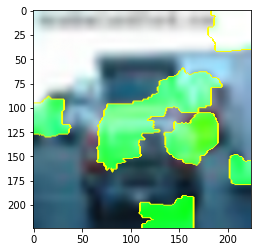

In [88]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

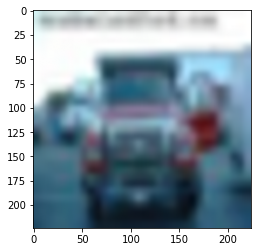

In [89]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp, mask))

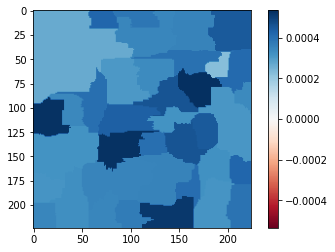

In [90]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()